In [1]:
# Project Image Filtering - Tests on my_imfilter function
# Based on previous and current work
# by James Hays for CSCI 1430 @ Brown and
# CS 4495/6476 @ Georgia Tech
%load_ext autoreload
%autoreload 2
# modified by Soochahn Lee @ Kookmin University
# For Introduction to Computer Vision course, Spring 2021
import os
from skimage.transform import rescale
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt
from helpers import load_image, save_image, add_snp_noise, vis_hybrid_image

from student import my_imfilter, my_medfilter, gen_hybrid_image

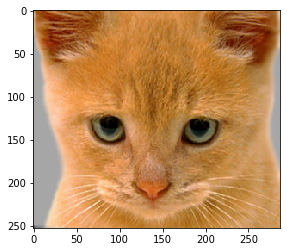

In [2]:
# Load images, make directory to store results, etc.
resultsDir = '..' + os.sep + 'results'
if not os.path.exists(resultsDir):
    os.mkdir(resultsDir)

test_image = load_image('../data/cat.bmp')
test_image = rescale(test_image, 0.7, mode='reflect', multichannel=True)
plt.imshow(test_image)
plt.show()

In [ ]:
'''
단위필터 (Identity filter)
이 필터는 경계선 처리 방식 옵션과 무관하게 아무 기능도 없어야 함
This filter should do nothing regardless of the padding method you use.
'''
identity_filter = np.asarray(
    [[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
identity_image = my_imfilter(test_image, identity_filter)
plt.imshow(identity_image)
plt.show()
# done = save_image('../results/identity_image.jpg', identity_image)

In [ ]:
'''
박스 필터를 통해 소량의 블러링 기능 적용
Small blur with a box filter
이 필터는 고주파수 성분을 일부분 제거해야 함
This filter should remove some high frequencies.
'''
blur_filter = np.ones((3, 3), dtype=np.float32)
# making the filter sum to 1
blur_filter /= np.sum(blur_filter, dtype=np.float32)
blur_image = my_imfilter(test_image, blur_filter)
plt.imshow(blur_image)
plt.show()
done = save_image(resultsDir + os.sep + 'blur_image.jpg', blur_image)

In [ ]:
'''
대량 블러링
Large blur

This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.
'''
# generate a 1x(2k+1) gaussian kernel with mean=0 and sigma = s, see https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
s, k = 10, 12
large_1d_blur_filter = np.asarray(
    [exp(-z*z/(2*s*s))/sqrt(2*pi*s*s) for z in range(-k, k+1)], dtype=np.float32)
# *problem with kernel, must be normalized to 1

########## added 210319
large_1d_blur_filter = large_1d_blur_filter.reshape(-1, 1)
#large_1d_blur_filter = np.expand_dims(large_1d_blur_filter, 1)
########## added 210319

large_1d_blur_filter /= large_1d_blur_filter.sum()

# apply 1D Gaussian filter in x-axis direction
large_blur_image = my_imfilter(test_image, large_1d_blur_filter)
# apply 1D Gaussian filter in y-axis direction
# notice the T operator which transposes the filter
large_blur_image = my_imfilter(large_blur_image, large_1d_blur_filter.T)

plt.imshow(large_blur_image)
plt.show()
done = save_image(resultsDir + os.sep +
                  'large_blur_image.jpg', large_blur_image)

# 대량 블러링의 느린 (무식한) 버전 
# Slow (naive) version of large blur
# (걸리는 시간을 테스트하고 싶으면 아래 코드의 주석처리를 해제하고 수행시켜보세요)
# import time
# large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
# t = time.time()
# large_blur_image = my_imfilter(test_image, large_blur_filter)
# t = time.time() - t
# print('{:f} seconds'.format(t))
##

In [ ]:
'''
방향성 필터 (Sobel 연산자)
Oriented filter (Sobel operator)
'''
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],
                          dtype=np.float32)  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
plt.show()
done = save_image(resultsDir + os.sep + 'sobel_image.jpg', sobel_image)

In [ ]:
'''
고주파 통과 필터 (이산 라플라시안)
High pass filter (discrete Laplacian)
'''
laplacian_filter = np.asarray(
    [[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure()
plt.imshow(laplacian_image)
plt.show()
done = save_image(resultsDir + os.sep + 'laplacian_image.jpg', laplacian_image)

# 고주파 통과 "필터" 대안
# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure()
plt.imshow(high_pass_image)
plt.show()
done = save_image(resultsDir + os.sep + 'high_pass_image.jpg', high_pass_image)

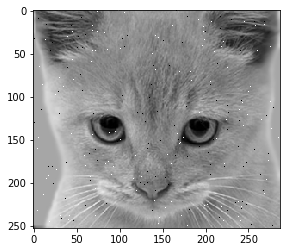

noisy image


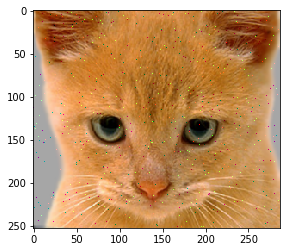

my_medfilter function in student.py is not implemented


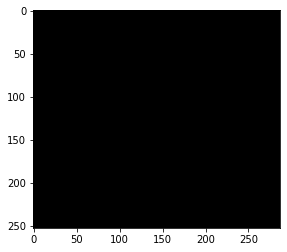

In [5]:
'''
중간값 필터
Median filter
'''
# TESTING add_snp_noise FOR GRAYSCALE IMAGE
# from skimage.color import rgb2gray
# test_img_gray = rgb2gray(test_image)
# test_noisy_image_gray = add_snp_noise(test_img_gray)
# plt.imshow(test_noisy_image_gray, cmap=plt.cm.gray)
# plt.show()

test_noisy_image = add_snp_noise(test_image)
print("noisy image")
plt.imshow(test_noisy_image)
plt.show()

size = 5
med_filter_image = my_medfilter(test_noisy_image, size)
plt.imshow(med_filter_image)
plt.show()
done = save_image(resultsDir + os.sep + 'median_filter_image.jpg', med_filter_image)

In [ ]:
'''
하이브리드 영상 생성
Generate hybrid imgaes
'''

# Setup
# Read images and convert to floating point format
image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3, 3))
plt.imshow((image1*255).astype(np.uint8))
plt.figure(figsize=(3, 3))
plt.imshow((image2*255).astype(np.uint8))

## Hybrid Image Construction ##
# cutoff_frequency is the standard deviation, in pixels, of the Gaussian#
# blur that will remove high frequencies. You may tune this per image pair
# to achieve better results.
cutoff_frequency = 7
low_frequencies, high_frequencies, hybrid_image = gen_hybrid_image(
    image1, image2, cutoff_frequency)

# Feel free to use different images, in data folder
# The hybrid images will differ depending on which image you
# assign as image1 (which will provide the low frequencies) and which image
# you asign as image2 (which will provide the high frequencies)

## Visualize and save outputs ##
plt.figure()
plt.imshow((low_frequencies*255).astype(np.uint8))
plt.figure()
plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8))
vis =vis_hybrid_image(hybrid_image)
plt.figure(figsize=(20, 20))
plt.imshow(vis)

save_image('../results/low_frequencies.jpg', low_frequencies)
outHigh = np.clip(high_frequencies + 0.5, 0.0, 1.0)
save_image('../results/high_frequencies.jpg', outHigh)
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)